<a href="https://colab.research.google.com/github/marcosmvgs/Airbnb-em-Hong-Kong/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Hong Kong*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Hong Kong localizada na China, é a cidade mais visitada no mundo!! Vamos ver os dados do Airbnb para essa cidade e extrair insights a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/china/hk/hong-kong/2021-12-20/visualisations/listings.csv")

Antes de iniciar qualquer análise, vamos dar uma olhada nas cinco primeiras linhas do *dataset*

In [ ]:
# Mostrar as cinco primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17891,Large Light Filled Loft,69063,Candace,NaN,Central & Western,22.28327,114.14988,Entire home/apt,1400,60,73,2017-11-29,0.51,1,0,0,NaN
1,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28350,114.14854,Entire home/apt,1338,2,135,2021-08-07,1.02,1,154,1,NaN
2,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.28418,114.15431,Entire home/apt,846,2,276,2021-11-20,2.16,9,251,4,NaN
3,104626,Entire Flat - Next to Man Mo Temple,544166,Celine,NaN,Central & Western,22.28360,114.14790,Entire home/apt,2455,1,14,2012-02-06,0.11,1,365,0,NaN
4,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,NaN,Central & Western,22.28921,114.14325,Entire home/apt,850,2,209,2021-04-08,1.65,9,202,2,NaN


## Conhecendo o *Dataset*


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Agora que já temos uma noção da forma como os dados estão dispostos. Vamos melhorar nossa consciência verficando quantas entradas (linhas) existem e o tipo de variável que tem em cada uma das colunas.

In [ ]:
# Quantidade de linhas e tipos de variáveis
print(print(f'Entradas: {df.shape[0]}\n'))
df.info()

Entradas: 5944

None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5944 entries, 0 to 5943
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5944 non-null   int64  
 1   name                            5943 non-null   object 
 2   host_id                         5944 non-null   int64  
 3   host_name                       5944 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   5944 non-null   object 
 6   latitude                        5944 non-null   float64
 7   longitude                       5944 non-null   float64
 8   room_type                       5944 non-null   object 
 9   price                           5944 non-null   int64  
 10  minimum_nights                  5944 non-null   int64  
 11  number_of_reviews               5944 non-null   int64  
 12  last_review  

Observando as informações acima pode-se ver que alguns dados não servem para muita coisa, por exemplo: ```neighbourhood_group``` **não tem nenhum valor não nulo**, ou seja, não temos informação sobre essa variável no *dataset* inteiro.

Então listaremos apenas as variáveis que serão utilizadas

**Dicionário das variáveis que serão utilizadas**

* ``` id ```: código identificador do anúncio
* ```name```: Título do anúncio 
* ```host_id```: código identificador do Anfitrião
* ```neighbourhood```: vizinhança (no Brasil podemos entender como bairro)
* ```latitude e longitude```: coordenadas geográficas (em graus) de cada acomodação
* ```room_type```: tipo de acomodação
* ```price```: preço por noite
* ```minimum_nights```: quantidade mínima de noites
* ```number_of_reviews```: número de avaliações
* ```availability_365```: disponibilidade da acomodação em um ano


Como as demais variáveis não são relevantes para nossa análise, vamos excluir as colunas correspondentes do *dataset*

In [ ]:
df.drop(columns=['neighbourhood_group', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews', 'license'], axis=1, inplace=True)

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# Dividindo a quantidade de valores ausentes pelo total do dataset em cada coluna.
df.isnull().sum().sort_values(ascending=False)*100 / df.shape[0]

name                     0.016824
id                       0.000000
host_id                  0.000000
host_name                0.000000
neighbourhood            0.000000
latitude                 0.000000
longitude                0.000000
room_type                0.000000
price                    0.000000
minimum_nights           0.000000
availability_365         0.000000
number_of_reviews_ltm    0.000000
dtype: float64

Com isso, verifica-se que apenas a coluna ```name``` que representa o título de cada anúncio tem 0,016% dos seus valores ausentes. Isso representa apenas uma entrada entre as 5944. Sendo assim, pode-se exlcluir essa linha e desconsiderá-la para a análise.

In [ ]:
# Excluindo a linha com Título do anúncio nulo
df.dropna(axis=0, how='any', inplace=True)

In [ ]:
# Verificando o número de entradas do dataset resultante. O esperado é que seja 5943 (uma linha apagada)
print(f'{df.shape[0]} entradas\n')
# Verificando que agora não temos mais valores nulos no dataset
df.info()

5943 entradas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 0 to 5943
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5943 non-null   int64  
 1   name                   5943 non-null   object 
 2   host_id                5943 non-null   int64  
 3   host_name              5943 non-null   object 
 4   neighbourhood          5943 non-null   object 
 5   latitude               5943 non-null   float64
 6   longitude              5943 non-null   float64
 7   room_type              5943 non-null   object 
 8   price                  5943 non-null   int64  
 9   minimum_nights         5943 non-null   int64  
 10  availability_365       5943 non-null   int64  
 11  number_of_reviews_ltm  5943 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 603.6+ KB


## Identificando e removendo *outliers*

### **Q3. Qual o tipo de distribuição das variáveis?** 

Um **Histograma** é um tipo de gráfico utilizado em estatística com a finalidade de analisar a frequência de valores de variáveis.

Os histogramas de cada variável numérica será plotado e será possível ver a frequência de cada uma delas e aparição de variáveis.

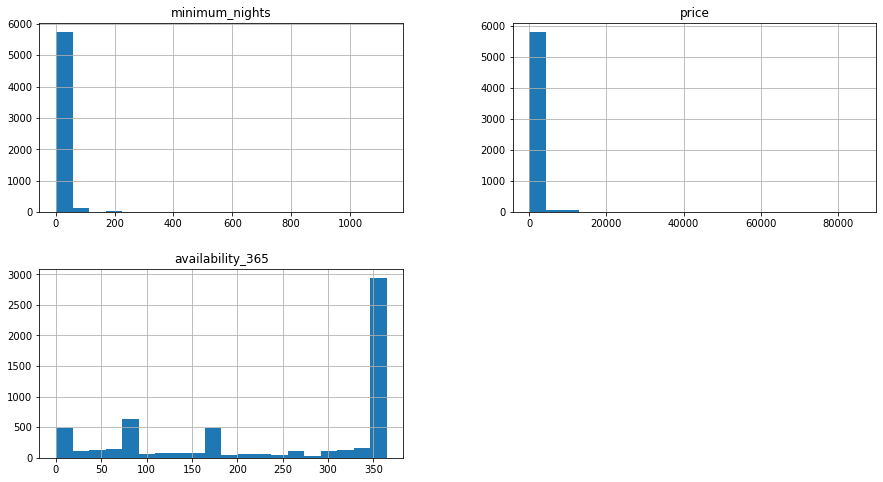

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(['minimum_nights', 'price', 'availability_365'], bins=20,figsize = (15 ,8));

A área de plote do **histograma** se extende até onde ele encontra algum valor no *dataset*, então no ```price``` por exemplo, apesar de não ser muito perceptível, sabe-se que tem acomodações por mais de **80 mil USD a noite** um absurdo difícil de acreditar né? Isso pode ser um *outlier*.<p>Vamos checar:

In [ ]:
# Verificando a acomodação com o maior preço por noite.
print(f'A acomodação mais cara é {df.price.max()} USD a noite')

A acomodação mais cara é 85670 USD a noite


### **Q4. Quais são os possíveis *outliers* do *dataset*?** 


Em estatística, ***outlier*** ou valor atípico, é uma observação que apresenta um grande afastamento das demais da série, ou que é inconsistente. A existência de outliers implica, tipicamente, em prejuízos a interpretação dos resultados dos testes estatísticos aplicados às amostras. Por isso temos que aprender a lidar com eles e, se viável, excluí-los do *dataset* em estudo. 

Outra maneira de detectar os *outliers* é por meio dos gráficos do tipo *boxplot*. Na figura abaixo pode-se ter boa noção de como ele funciona.

<img alt="Explicação gráfico boxplot" width="30%" src="https://raw.githubusercontent.com/marcosmvgs/Data-Science/master/boxplot2.png">

* Utilizando as definições do gráfico *boxplot* acima, vamos remover os *outliers* de cada coluna analisada;
* Para isso será definida uma função que remove os *outliers* do *dataframe* dada uma variável específica

In [ ]:
# Função que remove os outliers de uma variável no dataframe
def remover_outliers(dataframe, coluna):
  q1 = np.quantile(coluna, 0.25)                # Primeiro quartil
  q3 = np.quantile(coluna, 0.75)                # Segundo quartil 
  iqr = q3 - q1                                 # Intervalo interquartílico
  lim_sup = q3 + ((3/2) * iqr)                  # Limite superior (além dele é considerado outlier)
  lim_inf = q3 - ((3/2) * iqr)                  # Limite inferior (abaixo dele é considerado outlier)
  dataframe_sem_outlier_sup = dataframe.loc[coluna < lim_sup]
  dataframe_sem_outlier = dataframe_sem_outlier_sup.loc[coluna > lim_inf]
  porc_linhas_removidas = str((dataframe.shape[0] - dataframe_sem_outlier.shape[0])*100 / dataframe.shape[0])[0:5]
  print(f'{porc_linhas_removidas}% das linhas foram removidas')
  return dataframe_sem_outlier

#### Boxplot para ```minimum_nights```




Boxplot para a quantidade mínima de noites **ANTES** da remoção de outliers

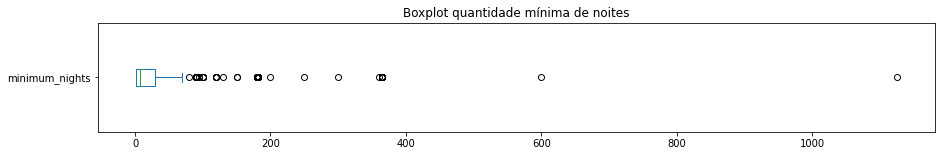

In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,2), title='Boxplot quantidade mínima de noites');

In [ ]:
# Removendo outliers
df = remover_outliers(df, df.minimum_nights)

2.086% das linhas foram removidas


Boxplot para a quantidade mínima de noites **DEPOIS** da remoção de *outliers*

[]

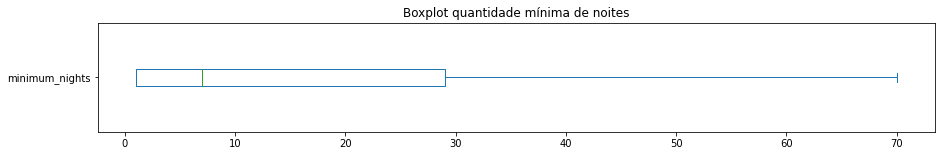

In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,2), title='Boxplot quantidade mínima de noites');
plt.plot()

#### Boxplot para ```prices```


Boxplot para o preço por noite **ANTES** da remoção dos *outliers*

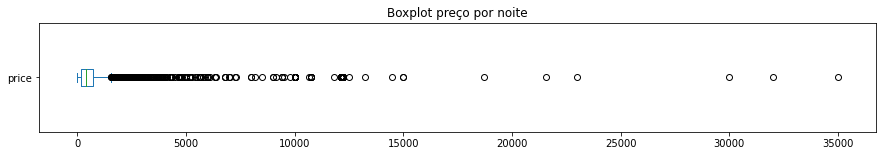

In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15,2), title='Boxplot preço por noite');

Pode-se perceber que existem *outliers* também para os preços. Vamos remove-los utilizando a função definida. 

In [ ]:
df = remover_outliers(df, df.price)

8.764% das linhas foram removidas


Boxplot para o preço por noite **ANTES** da remoção dos *outliers*

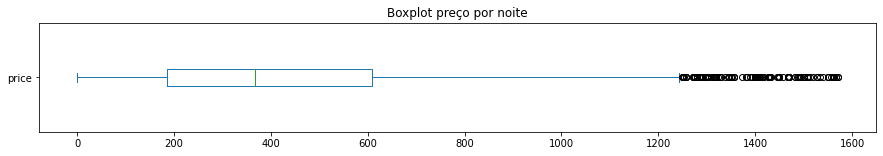

In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15,2), title='Boxplot preço por noite');

#### Boxplot para ```availability_365```


Boxplot para o disponibilidade anual

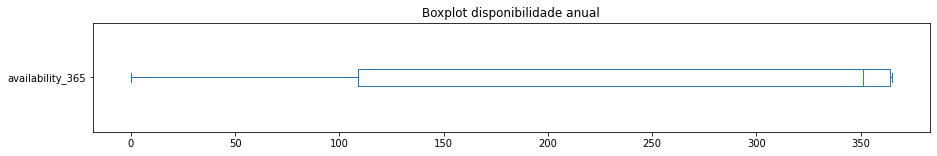

In [ ]:
df.availability_365.plot(kind='box', vert=False, figsize=(15,2), title='Boxplot disponibilidade anual');

OBS: como não temos presença de outliers para essa variável não é necessário rodar a função de remoção de *outliers* novamente.

---

Agora que nossa *dataset* está limpo (todos valores preenchido e sem outliers) podemos dar continuidade a análise dos dados

## Análise de dados

### **Q5. Qual a média dos preços de aluguel?**

Média geral

In [ ]:
print(f'A média dos preços de aluguel independente do tipo de imóvel é: {str(df.price.mean())[0:6].replace(".", ",")} USD')

A média dos preços de aluguel independente do tipo de imóvel é: 466,32 USD


Média por tipo de acomodação

In [ ]:
dados_grupados = df[['room_type', 'price']].groupby('room_type').mean().reset_index()

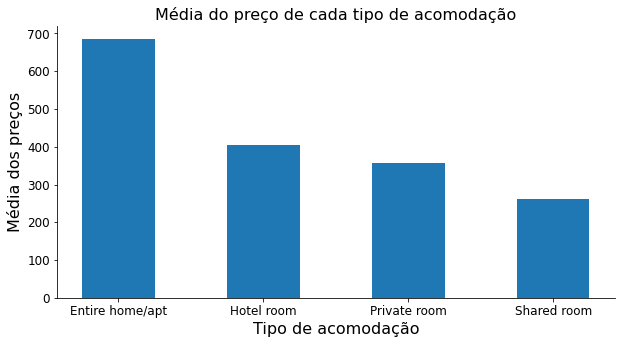

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(dados_grupados['room_type'].values, dados_grupados['price'], width =0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Tipo de acomodação', fontdict = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        })
plt.ylabel('Média dos preços', fontdict = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        });
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Média do preço de cada tipo de acomodação', fontsize=16);

### **Q4. Qual a correlação existente entre as variáveis**

Em probabilidade e estatística, correlação, dependência ou associação é qualquer relação estatística entre duas variáveis e correlação é qualquer relação dentro de uma ampla classe de relações estatísticas que envolva dependência entre duas variáveis.

Para nosso caso podemos encontrar ou não algumas correlações. Por exemplo: imóvel 

In [ ]:
# criando uma matriz de correlação
df_corr = df[['price', 'minimum_nights', 'availability_365']].corr()
display(df_corr)

,price,minimum_nights,availability_365
price,1.000000,-0.301382,-0.184406
minimum_nights,-0.301382,1.000000,0.350452
availability_365,-0.184406,0.350452,1.000000


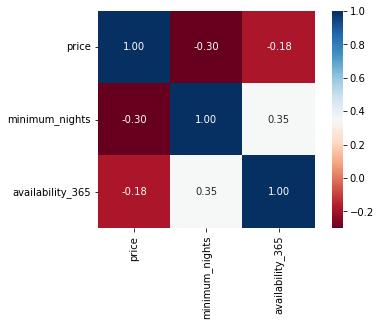

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(df_corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# Quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Private room       3051
Entire home/apt    1853
Shared room         323
Hotel room           82
Name: room_type, dtype: int64

In [ ]:
# Porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts()*100 / df.shape[0]

Private room       57.468450
Entire home/apt    34.902995
Shared room         6.084008
Hotel room          1.544547
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df.groupby('neighbourhood').price.mean().sort_values(ascending=False)[0:10]

neighbourhood
Southern             829.272727
Islands              819.045662
Tai Po               681.545455
Kwai Tsing           656.500000
Sai Kung             601.120690
Kwun Tong            578.692308
Tsuen Wan            575.300000
Sha Tin              536.526316
Tuen Mun             503.277778
Central & Western    486.932624
Name: price, dtype: float64

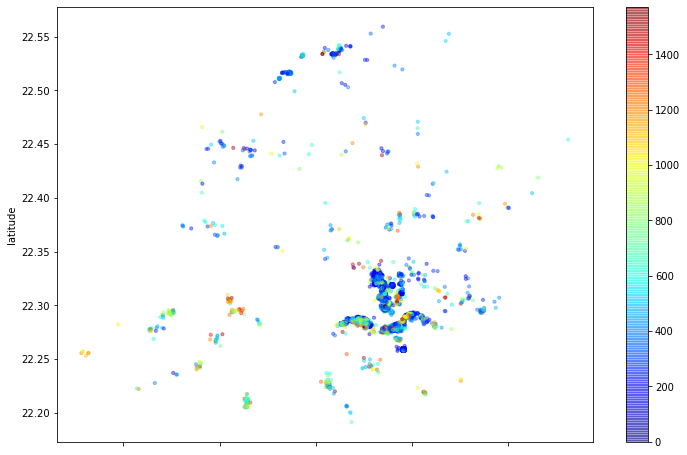

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df.price, s=10, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# Média de minimum_nights independente do tipo de imóvel
df.minimum_nights.mean()

# Média de minimum_nights para cada tipo de imóvel
df.groupby('room_type')[['minimum_nights']].mean()


,minimum_nights
room_type,
Entire home/apt,14.638964
Hotel room,2.475610
Private room,16.103573
Shared room,13.628483


###**Q8. Qual a média de minimum_nights dos imóveis que 

## Conclusões


* **57%** das pessoas que alugam imóveis pelo Airbnb em *Hong Kong* procuram por quartos privados, ou seja, apenas um quarto em um imóvel. Outros 35% procuram por imóveis inteiros ou apartamentos e os demais quartos compartilhados e quartos de hotel;

* O preço médio por noite para se hospedar na cidade mais visitada do mundo é **466 USD**. Caro né? Fui até procurar no Airbnb e é verdade, porém existem muitos quartos e apartamentos inteiros por cerca de 100 USD. Lembre-se que os 466 USD é uma média que também é influenciada por valores mais altos. 
* **Existe uma correlação positiva entre a disponibilidade do imóvel e a quantidade mínima de noites**, de modo que quanto maior é a quantidade mínima de noites maior é a disponibilidade. Não é possível afirmar isso, mas pode-se ter uma hipótese de que anfitriões que exigem maior quantidade de dias tem maior dificuldade de alugar.

* As regiões mais caras de *Hong Kong* são *Southern* onde se tem o *Star Ferry* um barco que faz um tour por várias regiões da cidade e por poucos dólares. E em segundo lugar temos as *Islands*, que abrigam diversos pontos turísticos, entre eles a *Disneyland* de *Hong Kong*. 